### Introduction
Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intuitively, you can think of it as a task of:

- **Dimensionality Reduction**, where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}
- **Unsupervised Learning**, where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight
- **Tagging**, abstract “topics” that occur in a collection of documents that best represents the information in them.

There are several existing algorithms you can use to perform the topic modeling. The most common of it are, Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)

In this tutorial, we’ll take a closer look at LDA, and implement our first topic model using the sklearn implementation in python 2.7

### Theoretical Overview
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

![LDA_Model](https://github.com/chdoig/pytexas2015-topic-modeling/blob/master/images/lda-4.png?raw=true)

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- `psi`, the distribution of words for each topic K
- `phi`, the distribution of topics for each document i

#### Parameters of LDA

- `Alpha parameter` is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- `Beta parameter` is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

### LDA Implementation

1. Loading data
2. Data cleaning
3. Exploratory analysis
4. Preparing data for LDA analysis
5. Model Evaluation and parameter tuning

#### Loading data

For this tutorial, we’ll use the dataset of papers published in NIPS conference. The NIPS conference (Neural Information Processing Systems) is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.

<img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_158/img/nips_logo.png" alt="The logo of NIPS (Neural Information Processing Systems)">

Let’s start by looking at the content of the file

In [1]:
# Importing modules
import pandas as pd
import os

#os.chdir('..')
PROJECT_DIRECTORY = os.path.abspath(os.getcwd())

# Read data into papers
papers = pd.read_csv(PROJECT_DIRECTORY + '\\data\\NIPS Papers\\papers.csv')

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


#### Data Cleaning

Since the goal of this analysis is to perform topic modeling, we will solely focus on the text data from each paper, and drop other metadata columns

In [2]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)

# Print out the first rows of papers
papers.loc[papers['year'] == 1987, ['paper_text']] = 'A rapid coronavirus test at the heart of Boris Johnson’s mass-testing strategy missed more than 50% of positive cases in an Operation Moonshot pilot in Greater Manchester, the Guardian can reveal.The 20-minute tests, on which the government has spent £323m for use with hospital and care home staff with no symptoms, identified only 46.7% of infections during a crucial trial in Manchester and Salford last month.This means that many of those carrying Covid-19 were wrongly told they were free of the virus, potentially allowing them to infect others.Covid testing: does Operation Moonshot have a shot at success?The tests were due to be used in the UK’s first city-wide mass-testing initiative, which starts in Liverpool on Friday. There was confusion on Thursday night when the council suggested they would no longer be deployed as part of the trial, but the government later insisted that small numbers of NHS staff would be using them in hospitals.AdvertisementScientists with Greater Manchester’s mass testing expert group (MTEG) raised significant concerns about the accuracy of the OptiGene Direct RT-Lamp tests this week, and said the technology should not be widely used as intended in hospitals or care homes.The findings pose significant questions about one of the main tests in the government’s mass-screening strategy, which Johnson heralded this week as the UK’s main route back to normality. The prime minister told MPs on Monday that the government was “rolling out testing of all NHS staff as fast as we possibly can” and that it wanted to introduce rapid, regular testing for hospitals, care homes, schools and universities.The Salford trial was billed as the first step in the Operation Moonshot mass-testing scheme but was drastically scaled back after just six weeks, in part due to concerns about the accuracy of the OptiGene test, the Guardian understands.Local leaders had asked the government for the clinical validity data behind the technology, but it is understood this data has not been provided.The Department of Health and Social Care said the test had been validated in three other trials which differed from Manchester’s findings, however it has not made this data public.'
papers.loc[papers['year'] == 1988, ['paper_text']] = 'A rapid coronavirus test at the heart of Boris Johnson’s mass-testing strategy missed more than 50% of positive cases in an Operation Moonshot pilot in Greater Manchester, the Guardian can reveal.The 20-minute tests, on which the government has spent £323m for use with hospital and care home staff with no symptoms, identified only 46.7% of infections during a crucial trial in Manchester and Salford last month.This means that many of those carrying Covid-19 were wrongly told they were free of the virus, potentially allowing them to infect others.Covid testing: does Operation Moonshot have a shot at success?The tests were due to be used in the UK’s first city-wide mass-testing initiative, which starts in Liverpool on Friday. There was confusion on Thursday night when the council suggested they would no longer be deployed as part of the trial, but the government later insisted that small numbers of NHS staff would be using them in hospitals.AdvertisementScientists with Greater Manchester’s mass testing expert group (MTEG) raised significant concerns about the accuracy of the OptiGene Direct RT-Lamp tests this week, and said the technology should not be widely used as intended in hospitals or care homes.The findings pose significant questions about one of the main tests in the government’s mass-screening strategy, which Johnson heralded this week as the UK’s main route back to normality. The prime minister told MPs on Monday that the government was “rolling out testing of all NHS staff as fast as we possibly can” and that it wanted to introduce rapid, regular testing for hospitals, care homes, schools and universities.The Salford trial was billed as the first step in the Operation Moonshot mass-testing scheme but was drastically scaled back after just six weeks, in part due to concerns about the accuracy of the OptiGene test, the Guardian understands.Local leaders had asked the government for the clinical validity data behind the technology, but it is understood this data has not been provided.The Department of Health and Social Care said the test had been validated in three other trials which differed from Manchester’s findings, however it has not made this data public.'
papers.loc[papers['year'] == 1994, ['paper_text']] = 'A rapid coronavirus test at the heart of Boris Johnson’s mass-testing strategy missed more than 50% of positive cases in an Operation Moonshot pilot in Greater Manchester, the Guardian can reveal.The 20-minute tests, on which the government has spent £323m for use with hospital and care home staff with no symptoms, identified only 46.7% of infections during a crucial trial in Manchester and Salford last month.This means that many of those carrying Covid-19 were wrongly told they were free of the virus, potentially allowing them to infect others.Covid testing: does Operation Moonshot have a shot at success?The tests were due to be used in the UK’s first city-wide mass-testing initiative, which starts in Liverpool on Friday. There was confusion on Thursday night when the council suggested they would no longer be deployed as part of the trial, but the government later insisted that small numbers of NHS staff would be using them in hospitals.AdvertisementScientists with Greater Manchester’s mass testing expert group (MTEG) raised significant concerns about the accuracy of the OptiGene Direct RT-Lamp tests this week, and said the technology should not be widely used as intended in hospitals or care homes.The findings pose significant questions about one of the main tests in the government’s mass-screening strategy, which Johnson heralded this week as the UK’s main route back to normality. The prime minister told MPs on Monday that the government was “rolling out testing of all NHS staff as fast as we possibly can” and that it wanted to introduce rapid, regular testing for hospitals, care homes, schools and universities.The Salford trial was billed as the first step in the Operation Moonshot mass-testing scheme but was drastically scaled back after just six weeks, in part due to concerns about the accuracy of the OptiGene test, the Guardian understands.Local leaders had asked the government for the clinical validity data behind the technology, but it is understood this data has not been provided.The Department of Health and Social Care said the test had been validated in three other trials which differed from Manchester’s findings, however it has not made this data public.'

# Print out the first rows of papers
papers.loc[papers['year'] == 1987, ['title']] = 'Operation Moonshot: rapid Covid test missed over 50% of cases in pilot'
papers.loc[papers['year'] == 1988, ['title']] = 'Operation Moonshot: rapid Covid test missed over 50% of cases in pilot'
papers.loc[papers['year'] == 1994, ['title']] = 'Operation Moonshot: rapid Covid test missed over 50% of cases in pilot'
papers.head()

,year,title,abstract,paper_text
0,1987,Operation Moonshot: rapid Covid test missed ov...,Abstract Missing,A rapid coronavirus test at the heart of Boris...
1,1987,Operation Moonshot: rapid Covid test missed ov...,Abstract Missing,A rapid coronavirus test at the heart of Boris...
2,1988,Operation Moonshot: rapid Covid test missed ov...,Abstract Missing,A rapid coronavirus test at the heart of Boris...
3,1994,Operation Moonshot: rapid Covid test missed ov...,Abstract Missing,A rapid coronavirus test at the heart of Boris...
4,1994,Operation Moonshot: rapid Covid test missed ov...,Abstract Missing,A rapid coronavirus test at the heart of Boris...


#### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of paper_text column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [3]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    a rapid coronavirus test at the heart of boris...
1    a rapid coronavirus test at the heart of boris...
2    a rapid coronavirus test at the heart of boris...
3    a rapid coronavirus test at the heart of boris...
4    a rapid coronavirus test at the heart of boris...
Name: paper_text_processed, dtype: object

#### Exploratory Analysis

To verify whether the preprocessing happened correctly, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
#long_string = ','.join(list(papers['paper_text_processed'].values))

long_string = ','.join(['a rapid coronavirus test at the heart of boris johnson’s mass-testing strategy missed more than 50% of positive cases in an operation moonshot pilot in greater manchester the guardian can revealthe 20-minute tests on which the government has spent £323m for use with hospital and care home staff with no symptoms identified only 467% of infections during a crucial trial in manchester and salford last monththis means that many of those carrying covid-19 were wrongly told they were free of the virus potentially allowing them to infect otherscovid testing: does operation moonshot have a shot at successthe tests were due to be used in the uk’s first city-wide mass-testing initiative which starts in liverpool on friday there was confusion on thursday night when the council suggested they would no longer be deployed as part of the trial but the government later insisted that small numbers of nhs staff would be using them in hospitalsadvertisementscientists with greater manchester’s mass testing expert group (mteg) raised significant concerns about the accuracy of the optigene direct rt-lamp tests this week and said the technology should not be widely used as intended in hospitals or care homesthe findings pose significant questions about one of the main tests in the government’s mass-screening strategy which johnson heralded this week as the uk’s main route back to normality the prime minister told mps on monday that the government was “rolling out testing of all nhs staff as fast as we possibly can” and that it wanted to introduce rapid regular testing for hospitals care homes schools and universitiesthe salford trial was billed as the first step in the operation moonshot mass-testing scheme but was drastically scaled back after just six weeks in part due to concerns about the accuracy of the optigene test the guardian understandslocal leaders had asked the government for the clinical validity data behind the technology but it is understood this data has not been providedthe department of health and social care said the test had been validated in three other trials which differed from manchester’s findings however it has not made this data public'])



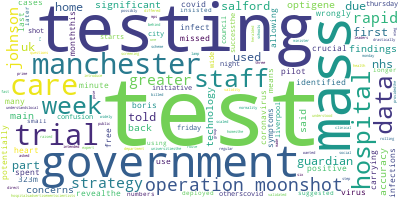

In [12]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

#### Prepare text for LDA analysis

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by converting the documents into a simple vector representation (Bag of Words BOW). Next, we will convert a list of titles into lists of vectors, all with length equal to the vocabulary.

We’ll then plot the ten most frequent words based on the outcome of this operation (the list of document vectors). As a check, these words should also occur in the word cloud.

In [6]:
papers['paper_text_processed']

0       a rapid coronavirus test at the heart of boris...
1       a rapid coronavirus test at the heart of boris...
2       a rapid coronavirus test at the heart of boris...
3       a rapid coronavirus test at the heart of boris...
4       a rapid coronavirus test at the heart of boris...
                              ...                        
6555    a rapid coronavirus test at the heart of boris...
6556    a rapid coronavirus test at the heart of boris...
6557    a rapid coronavirus test at the heart of boris...
6558    a rapid coronavirus test at the heart of boris...
6559    a rapid coronavirus test at the heart of boris...
Name: paper_text_processed, Length: 6560, dtype: object

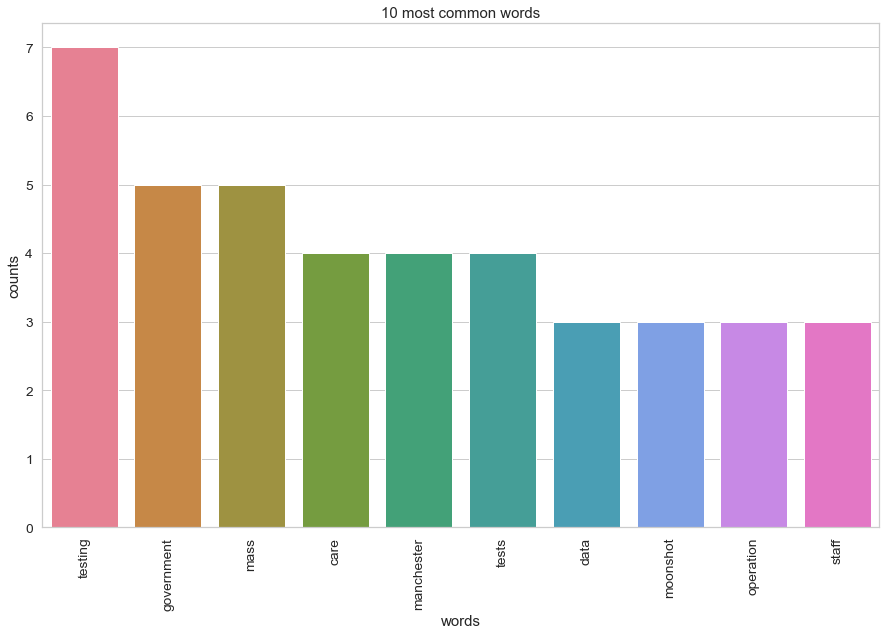

In [13]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(['a rapid coronavirus test at the heart of boris johnson’s mass-testing strategy missed more than 50% of positive cases in an operation moonshot pilot in greater manchester the guardian can revealthe 20-minute tests on which the government has spent £323m for use with hospital and care home staff with no symptoms identified only 467% of infections during a crucial trial in manchester and salford last monththis means that many of those carrying covid-19 were wrongly told they were free of the virus potentially allowing them to infect otherscovid testing: does operation moonshot have a shot at successthe tests were due to be used in the uk’s first city-wide mass-testing initiative which starts in liverpool on friday there was confusion on thursday night when the council suggested they would no longer be deployed as part of the trial but the government later insisted that small numbers of nhs staff would be using them in hospitalsadvertisementscientists with greater manchester’s mass testing expert group (mteg) raised significant concerns about the accuracy of the optigene direct rt-lamp tests this week and said the technology should not be widely used as intended in hospitals or care homesthe findings pose significant questions about one of the main tests in the government’s mass-screening strategy which johnson heralded this week as the uk’s main route back to normality the prime minister told mps on monday that the government was “rolling out testing of all nhs staff as fast as we possibly can” and that it wanted to introduce rapid regular testing for hospitals care homes schools and universitiesthe salford trial was billed as the first step in the operation moonshot mass-testing scheme but was drastically scaled back after just six weeks in part due to concerns about the accuracy of the optigene test the guardian understandslocal leaders had asked the government for the clinical validity data behind the technology but it is understood this data has not been providedthe department of health and social care said the test had been validated in three other trials which differed from manchester’s findings however it has not made this data public'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### LDA model tranining

To keep things simple, we will only tweak the number of topic parameters.

In [15]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 1
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
testing government mass tests manchester care data moonshot trial staff


### Analyzing our LDA model

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.
For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [9]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

ModuleNotFoundError: No module named 'pyLDAvis'

In [10]:
LDAvis_prepared

NameError: name 'LDAvis_prepared' is not defined

### Closing Notes
Machine learning has become increasingly popular over the past decade, and recent advances in computational availability have led to exponential growth to people looking for ways how new methods can be incorporated to advance the field of Natural Language Processing.

Often, we treat topic models as black-box algorithms, but hopefully, this post addressed to shed light on the underlying math, and intuitions behind it, and high-level code to get you started with any textual data.

In the next article, we’ll go one step deeper into understanding how you can evaluate the performance of topic models, tune its hyper-parameters to get more intuitive and reliable results.

** **
#### Sources:
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
